In [257]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [258]:
img  = cv2.imread("images/Lenna", cv2.IMREAD_GRAYSCALE)

In [259]:
mask = cv2.circle(np.zeros((h,w)), (np.uint8(h/2), np.uint8(w/2)), 80, 255, -1)
mask = np.uint8(mask)

In [265]:
output_and = np.uint8(np.zeros((h, w)))
output_or = np.uint8(np.zeros((h, w)))
output_xor = np.uint8(np.zeros((h, w)))
output_not = np.uint8(np.zeros((h, w)))

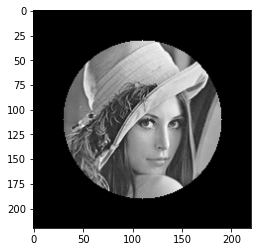

In [266]:
def sung_and(img, mask) :
    for x in range(0, h) :
        for y in range(0, w) :
            a = bin(img[x, y])[2:].zfill(8)
            b = bin(mask[x, y])[2:].zfill(8)
            c = '00000000'
            for z in range(0, 8) :
                if (a[z] == '1' and b[z] == '1') :
                    c = c[:z] + '1' + c[z+1:]
            output_and[x,y] = int(c, 2)
    return output_and

plt.imshow(sung_and(img, mask), cmap = 'gray')

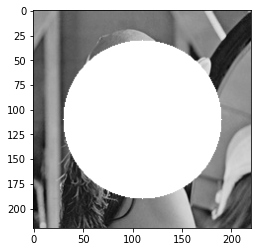

In [267]:
def sung_or(img, mask) :
    for x in range(0, h) :
        for y in range(0, w) :
            a = bin(img[x, y])[2:].zfill(8)
            b = bin(mask[x, y])[2:].zfill(8)
            c = '00000000'
            for z in range(0, 8) :
                if (a[z] == '1' or b[z] == '1') :
                    c = c[:z] + '1' + c[z+1:]
            output_or[x,y] = int(c, 2)
    return output_or

plt.imshow(sung_or(img, mask), cmap = 'gray')

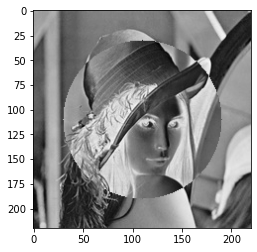

In [268]:
def sung_xor(img, mask) :
    for x in range(0, h) :
        for y in range(0, w) :
            a = bin(img[x, y])[2:].zfill(8)
            b = bin(mask[x, y])[2:].zfill(8)
            c = '00000000'
            for z in range(0, 8) :
                if (a[z] != b[z] ) :
                    c = c[:z] + '1' + c[z+1:]
            output_xor[x,y] = int(c, 2)
    return output_xor

plt.imshow(sung_xor(img, mask), cmap = 'gray')

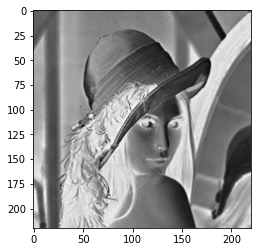

In [269]:
def sung_not(img, mask) :
    for x in range(0, h) :
        for y in range(0, w) :
            a = bin(img[x, y])[2:].zfill(8)
            b = bin(mask[x, y])[2:].zfill(8)
            c = '00000000'
            for z in range(0, 8) :
                if (a[z] == '0') :
                    c = c[:z] + '1' + c[z+1:]
                elif (a[z] == '1') :
                    c = c[:z] + '0' + c[z+1:]
            output_not[x,y] = int(c, 2)
    return output_not

plt.imshow(sung_not(img, mask), cmap = 'gray')

In [255]:
print(np.array_equal(sung_and(img, mask), cv2.bitwise_and(img, mask)))
print(np.array_equal(sung_or(img, mask), cv2.bitwise_or(img, mask)))
print(np.array_equal(sung_xor(img, mask), cv2.bitwise_xor(img, mask)))
print(np.array_equal(sung_not(img, mask), cv2.bitwise_not(img, mask)))

True
True
True
True
